# Employee Turnover Analytics

# Step 1: Import dependencies, Load Data and Perform Data Quality Checks

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset into a dataframe (update this path as per your file location)
df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')

In [3]:
# Display first five rows
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Display last five rows
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df = df.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                           'sales':'department'
                       })

# Display all column names after renaming
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
# Display first five rows
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [11]:
df.isnull().sum()[df.isnull().sum()>0]

,0


Result: No missing value found

# Step 2: Exploratory Data Analysis (EDA)

Understand what factors contributed most to employee turnover at EDA.

## Step 2.1: Draw Correlation Heatmap

Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

In [12]:
df.corr(numeric_only=True) #pip install seaborn --upgrade

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

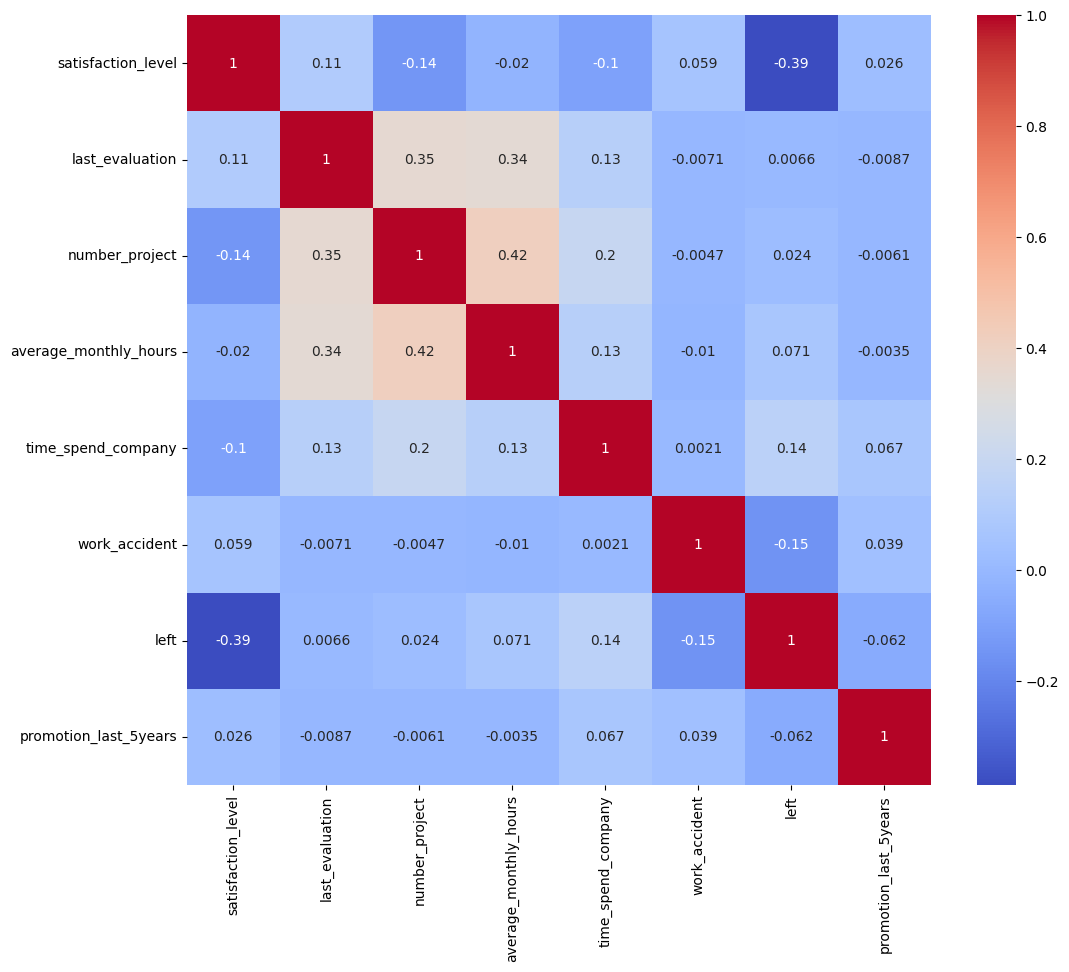

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

1. Understanding the Heatmap:

* The color scale on the right shows correlation values ranging from -1 (strong negative correlation) to 1 (strong positive correlation).
* Red areas indicate a strong positive correlation.
* Blue areas indicate a strong negative correlation.
* White/neutral colors indicate little to no correlation.

2. Key Observations from the Heatmap:

* Satisfaction Level vs. Leaving the Company (left): There is a strong negative correlation (-0.39), meaning employees with lower satisfaction levels are more likely to leave.
* Number of Projects vs. Average Monthly Hours: There is a strong positive correlation (0.42), meaning employees with more projects tend to work more hours.
* Last Evaluation vs. Number of Projects: A moderate positive correlation (0.35), suggesting that employees who score higher in evaluations tend to take on more projects.
* Time Spent in the Company vs. Leaving (left): A slight positive correlation (0.14), indicating that employees who have been in the company longer may have a slightly higher tendency to leave.
* Work Accident vs. Leaving (left): A weak negative correlation (-0.15), meaning employees who had work accidents are slightly less likely to leave.

3. Implications of the Heatmap:

* Employee satisfaction level appears to be one of the strongest indicators of whether an employee will leave.
* Higher workload (more projects, more hours) is associated with higher performance evaluations.
* Promotion in the last 5 years has little correlation with most other variables, suggesting it may not be a strong factor in employee retention.

## 2.3 Draw distribution plot:

Draw the distribution plot of:

* Employee Satisfaction (use column satisfaction_level)
* Employee Evaluation (use column last_evaluation)
* Employee Average Monthly Hours (use column average_montly_hours)

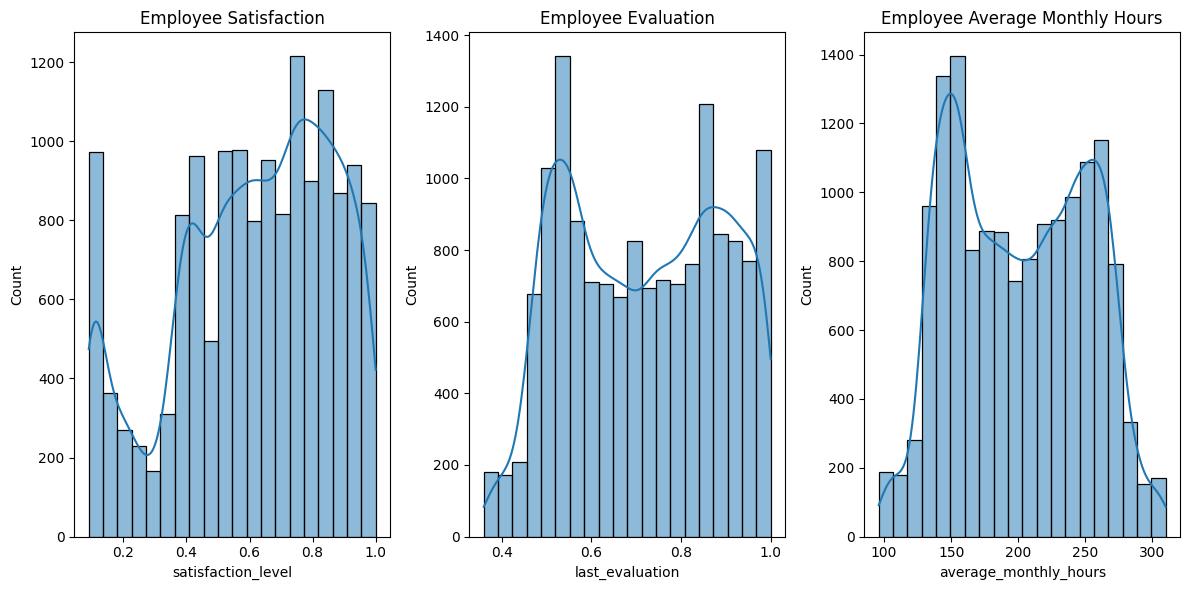

In [14]:
# Draw the distribution plot of:
# - Employee Satisfaction (use column satisfaction_level)
# - Employee Evaluation (use column last_evaluation)
# - Employee Average Monthly Hours (use column average_montly_hours)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'],kde=True,bins=20)
plt.title('Employee Satisfaction')

plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'],kde=True,bins=20)
plt.title('Employee Evaluation')

plt.subplot(1, 3, 3)
sns.histplot(df['average_monthly_hours'],kde=True,bins=20)
plt.title('Employee Average Monthly Hours')
plt.tight_layout()
plt.show()


## 2.3 Draw the bar plot

Draw the bar plot of the employee project count of both employees
who left and stayed in the organization (use column number_project
and hue column left), and give your inferences from the plot.

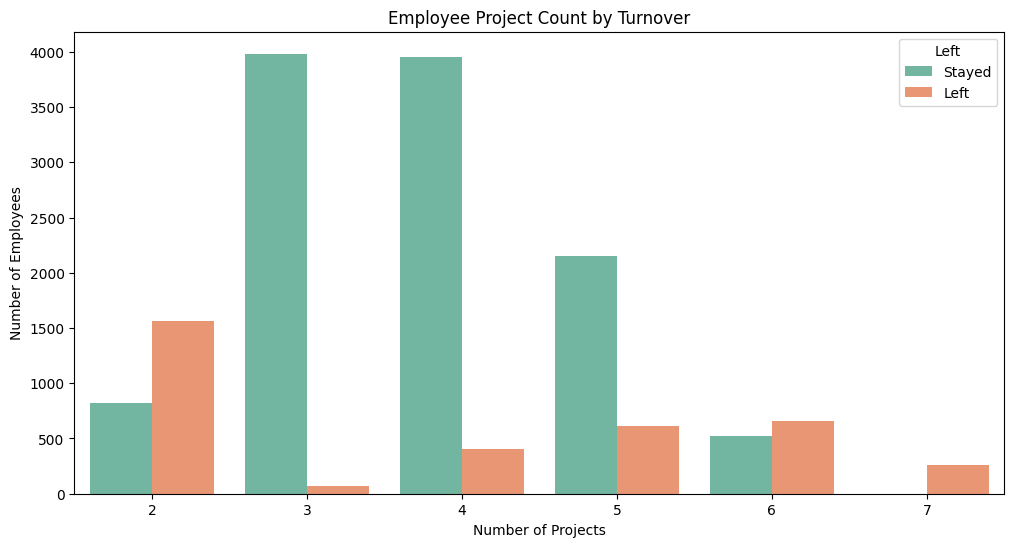

In [15]:
# prompt: Draw the bar plot of the employee project count of both employees
# who left and stayed in the organization (use column number_project
# and hue column left), and give your inferences from the plot.

plt.figure(figsize=(12, 6))
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')
plt.title('Employee Project Count by Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left',labels=['Stayed', 'Left'])
plt.show()


### Possible Inferences:

**1. High Workload and Employee Turnover:**
Employees handling an excessive number of projects (e.g., 6 or 7) tend to have a higher likelihood of leaving the company. This suggests that an overwhelming workload may contribute to employee dissatisfaction and turnover.

**2. Balanced Workload and Retention:**
Employees managing a moderate number of projects (e.g., 3 to 5) generally exhibit lower turnover rates. This indicates that maintaining a balanced *workload* is beneficial for employee retention.

**3. Underutilization and Turnover Risk:**
Employees assigned very few projects (e.g., only 2) may also have higher turnover rates. This suggests that a lack of engagement or underutilization can be a contributing factor to employee departures.

**4. Ideal Project Load for Retention:**
The data may highlight an optimal project range (e.g., 3 to 5 projects) where turnover rates are lowest, implying that a well-managed workload fosters job satisfaction and long-term employee commitment.

# Step 3: Perform clustering

Perform clustering of employees who left based on their satisfaction and
evaluation.

## 3.1. Choose columns satisfaction_level, last_evaluation, and left.

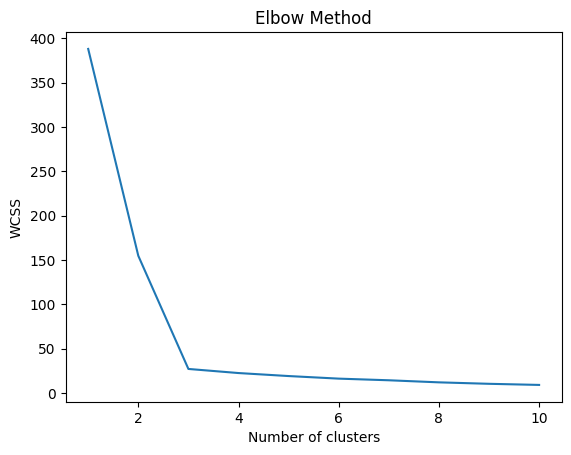

In [16]:
# Perform clustering of employees who left based on their satisfaction and evaluation.

# Load KMeans Module
from sklearn.cluster import KMeans

# Create a new DataFrame with the selected columns
df_clustering = df[['satisfaction_level', 'last_evaluation', 'left']]

# Filter for employees who left the company
df_left = df_clustering[df_clustering['left'] == 1]

# Prepare the data for clustering
X = df_left[['satisfaction_level', 'last_evaluation']]

# Determine the optimal number of clusters (e.g., using the elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Analysis:
Based on the elbow method, the optimal number of clusters is 3


## 3.2. Do K-means clustering of employees who left the company into 3 clusters

---



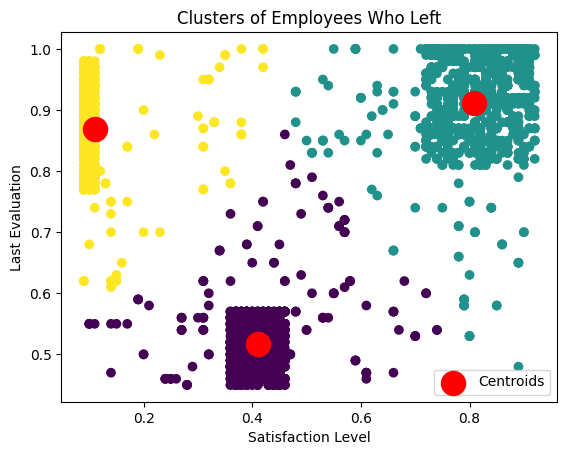

In [17]:
# Based on the elbow method, the optimal number of clusters is 3
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_left['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'], c=df_left['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()



In [18]:
# This would provide the mean satisfaction and evaluation levels for each cluster.

print(df_left.groupby('cluster').agg({'satisfaction_level':'mean', 'last_evaluation':'mean'}))


         satisfaction_level  last_evaluation
cluster                                     
0                  0.410145         0.516982
1                  0.808516         0.911709
2                  0.111155         0.869301


## 3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.











**Cluster Analysis**

Each cluster in the given diagram above represents a group of employees who left the company, with similar satisfaction and evaluation levels.

---


#### Cluster 0 (Purple) - Low Satisfaction, Low Evaluation:

**Possible Reasons for Leaving:**
Employees in this cluster may have been underperforming and unhappy with their jobs.  This could point to issues with job fit, lack of growth opportunities, or poor management.

**Retention Strategies:**
* Improve workplace conditions and job roles.
* Provide clear and constructive feedback.
* Implement employee engagement programs to address dissatisfaction.

---

#### Cluster 1 (Green) - High Satisfaction, High Evaluation:

**Possible Reasons for Leaving:**
 This cluster is more nuanced and might represent employees who left for reasons *other* than dissatisfaction or poor performance.  They might have found better opportunities elsewhere, relocated, or retired.  Further investigation is needed to understand the reasons for their departure.  Investigate factors like salary, promotions, or external opportunities.

**Retention Strategies:**

* Offer career development programs and growth opportunities.
* Recognize and reward top performers to retain them.
* Conduct stay interviews to understand their future aspirations and address concerns.

 ---

#### Cluster 3 (Yellow) - Low Satisfaction, High Evaluation:

**Possible Reasons for Leaving:**
This cluster could indicate employees who were initially performing well, but later became dissatisfied. The reasons could be workload, lack of recognition, or change in management.

* Engage these employees to understand their concerns and aspirations.
* Provide professional development and training programs.
* Enhance job roles to make them more challenging and fulfilling.



#### Summary:
By understanding these clusters, the HR department can customize retention strategies to effectively address the unique needs and concerns of various employee groups.

# Step 4. Handle the left Class Imbalance using the SMOTE technique.

## 4.1. Pre-process the data by converting categorical columns to numerical columns by:
* Separating categorical variables and numeric variables
* Applying get_dummies() to the categorical variables
* Combining categorical variables and numeric variables

In [19]:
# Separate features (X) and target variable (y)
X = df.drop('left', axis=1)
y = df['left']

# Separate categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


# Apply get_dummies to categorical features
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True, dtype=int)

# Combine categorical and numerical features
X = pd.concat([X[numerical_cols], X_categorical], axis=1)

# Apply SMOTE to handle class imbalance
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)


Categorical Columns: Index(['department', 'salary'], dtype='object')
Numerical Columns: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years'],
      dtype='object')


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   promotion_last_5years   14999 non-null  int64  
 7   department_RandD        14999 non-null  int64  
 8   department_accounting   14999 non-null  int64  
 9   department_hr           14999 non-null  int64  
 10  department_management   14999 non-null  int64  
 11  department_marketing    14999 non-null  int64  
 12  department_product_mng  14999 non-null  int64  
 13  department_sales        14999 non-null  int64  
 14  department_support      14999 non-null

## 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [21]:
# Load train_test_split Module
from sklearn.model_selection import train_test_split


# Split the resampled data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## 4.3 Upsample the train dataset using the SMOTE technique from the imblearn module.

In [22]:
# Load SMOTE Module
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)


# Step 5. Perform 5-fold cross-validation model training and evaluate performance.

## 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Define the cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression()

# fit test value into the model
logreg.fit(X_train_upsampled,y_train_upsampled)

# Perform cross-validation prediction
y_pred = cross_val_predict(logreg, X_train_upsampled, y_train_upsampled, cv=kf)

# Generate and print the classification report
print(classification_report(y_train_upsampled, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      9142
           1       0.77      0.81      0.79      9142

    accuracy                           0.78     18284
   macro avg       0.79      0.78      0.78     18284
weighted avg       0.79      0.78      0.78     18284



## 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# fit test value into the model
rf_classifier.fit(X_train_upsampled,y_train_upsampled)

# Perform cross-validation prediction
y_pred_rf = cross_val_predict(rf_classifier, X_train_upsampled, y_train_upsampled, cv=kf)

# Generate and print the classification report
print(classification_report(y_train_upsampled, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284



## 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# fit test value into the model
gb_classifier.fit(X_train_upsampled,y_train_upsampled)

# Perform cross-validation prediction
y_pred_gb = cross_val_predict(gb_classifier, X_train_upsampled, y_train_upsampled, cv=kf)

# Generate and print the classification report
print(classification_report(y_train_upsampled, y_pred_gb))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9142
           1       0.97      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



# Step 6. Identify the best model and justify the evaluation metrics used.

## 6.1. Find the ROC/AUC for each model and plot the ROC curve.

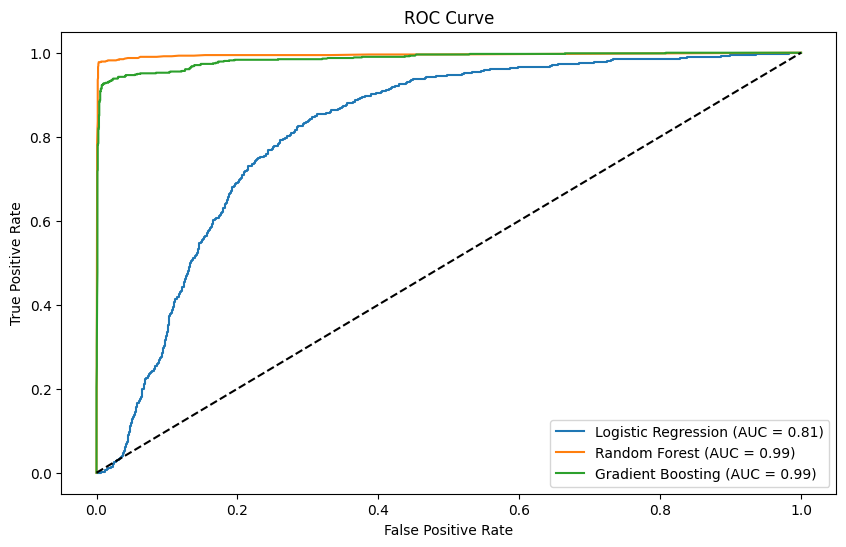

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained and predicted using the models (logreg, rf_classifier, gb_classifier) as shown in the previous code.
# Also assuming you have y_test and respective y_pred from the test set.

# Function to plot the ROC curve for a given model
def plot_roc_curve(model_name, y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Get probability estimates for the test set
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
plot_roc_curve('Logistic Regression', y_test, y_prob_logreg)
plot_roc_curve('Random Forest', y_test, y_prob_rf)
plot_roc_curve('Gradient Boosting', y_test, y_prob_gb)

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 6.2. Find the confusion matrix for each of the models.

### Logistic Regression Confusion Matrix

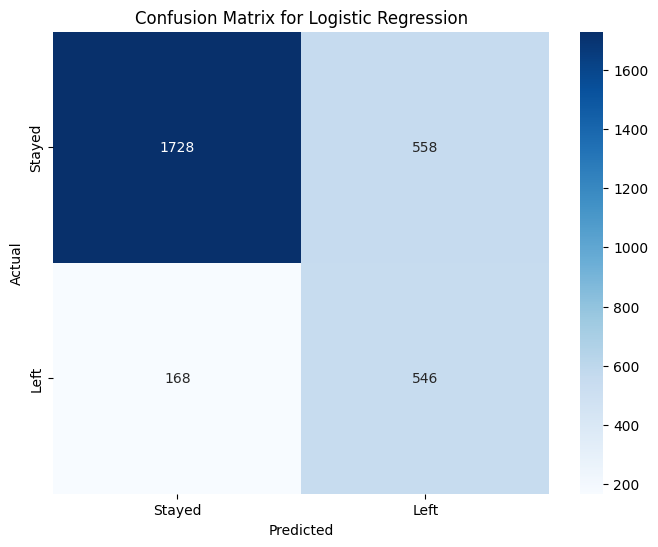

In [27]:
# Load confusion_matrix Module
from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg.predict(X_test))
#print("Logistic Regression Confusion Matrix:\n", cm_logreg)

#Draw Chart Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

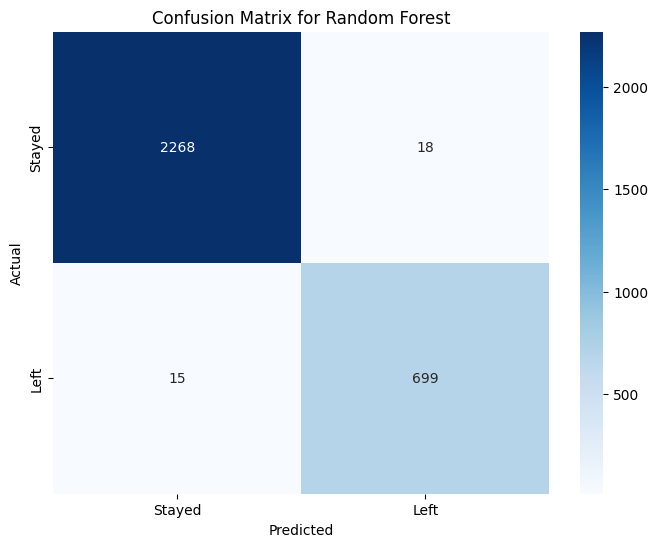

In [28]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_classifier.predict(X_test))

#Draw Chart Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




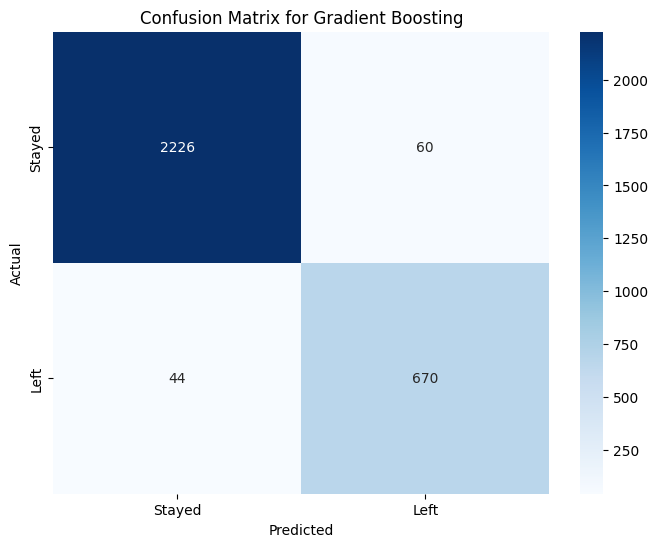

In [29]:
# Gradient Boosting Confusion Matrix
cm_gb = confusion_matrix(y_test, gb_classifier.predict(X_test))

#Draw Chart Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

Assuming the goal is to minimize employee turnover (correctly identify employees who will leave).

In this scenario, Recall is the more important metric.

**Explanation:**

* Recall (Sensitivity or True Positive Rate):  Measures the proportion of actual positive cases (employees who left) that were correctly identified by the model.  A high recall means the model is good at capturing most of the employees who will leave.  In the context of employee turnover, it's crucial to identify as many employees at risk of leaving as possible, even if it means some false positives (incorrectly identifying employees who will stay as leaving).  Minimizing the number of employees who leave undetected is more critical than minimizing false alarms.

* Precision (Positive Predictive Value): Measures the proportion of predicted positive cases (employees predicted to leave) that are actually positive.  A high precision means that when the model predicts an employee will leave, it is highly likely that the employee will indeed leave. While precision is important, in the context of employee retention, it is less critical than recall.  A few false positives (predicting an employee will leave when they won't) might be acceptable if it means we can intervene and try to retain a greater number of employees who would otherwise leave.  It's more costly to miss an employee who will leave than to wrongly identify an employee as leaving.


* In summary, for employee retention prediction, a model with higher recall is preferable because it prioritizes identifying all potential leavers, even at the cost of some false alarms.  While precision is desirable, a high recall is more crucial for effective interventions.

# Step 7. Suggest various retention strategies for targeted employees

## 7.1. Using the best model, predict the probability of employee turnover in the test data.

In [30]:
# Predict probabilities for the test set using the best model
# Assuming Random Forest is the best model based on previous results

y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# # Create a DataFrame with employee IDs, actual turnover, and predicted probabilities
# results_df = pd.DataFrame({'Actual_Turnover': y_test, 'Predicted_Probability': y_prob_rf})

# # Display the results
# print(results_df.head())

df_test = X_test.copy()
df_test['left_prob'] = y_prob_rf


## 7.2 Employee categorization and retention strategies

Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
- Safe Zone (Green) (Score < 20%)
-  Low-Risk Zone (Yellow) (20% < Score < 60%)
-  Medium-Risk Zone (Orange) (60% < Score < 90%)
-  High-Risk Zone (Red) (Score > 90%).

In [31]:
def retention_strategy(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(retention_strategy)

In [32]:
# Count occurrences of each retention zone
zone_counts = df_test['retention_zone'].value_counts()

In [44]:
display(zone_counts)

,count
retention_zone,
Safe Zone (Green),2142
High-Risk Zone (Red),657
Low-Risk Zone (Yellow),152
Medium-Risk Zone (Orange),49


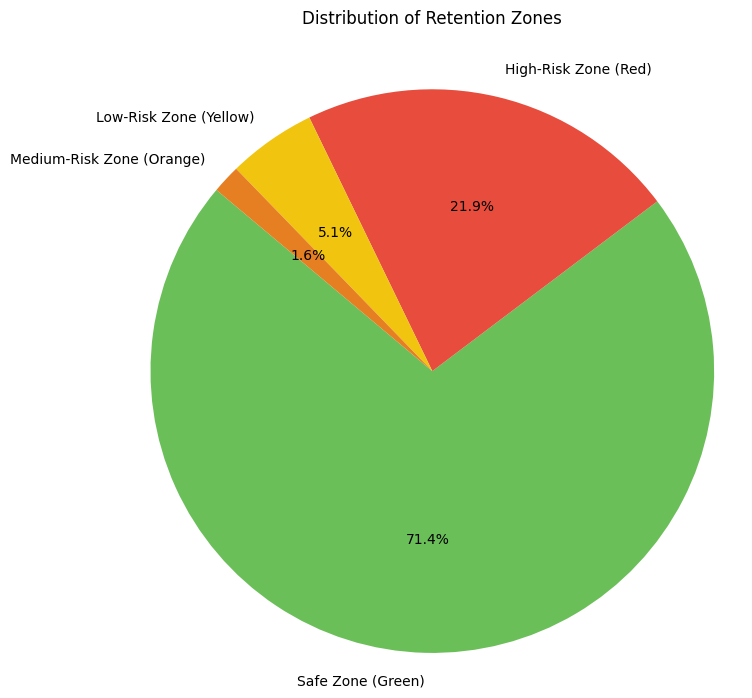

In [45]:
# pie chart for zone_counts
plt.figure(figsize=(8, 8))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', startangle=140, colors=['#6BBF59', '#E74C3C', '#F1C40F', '#E67E22']) # Using Material Design color palette
plt.title('Distribution of Retention Zones', y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Safe Zone(Green):**
- Proactive Engagement:  Maintain open communication, offer growth opportunities (mentorship, training), and recognize achievements.  Periodic pulse surveys to gauge satisfaction.


**Low-Risk Zone (Yellow):**
- Increased Engagement:  Regular check-ins, explore career development options, provide feedback and support.  Address any concerns proactively.


**Medium-Risk Zone (Orange):**
- Targeted Interventions:  Prioritize one-on-one meetings to understand concerns, offer tailored support and development plans.  Explore potential compensation or benefits adjustments.  Consider a mentorship program.


**High-Risk Zone (Red):**
- Immediate Action:  Urgent one-on-one meetings to address specific issues and understand root causes of potential departure.  Explore retention bonuses or alternative roles.  Initiate exit interviews to understand reasons for leaving even if employee remains.